### Natural language processing with reddits comments(MLS, NFL)

#### Importing library 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import StandardScaler

import string

#### Importing our data 

In [4]:
import requests 
ref = 'https://api.pushshift.io/reddit/search/comment'

In [5]:
paramet ={'subreddit': 'MLS',
          'size': 935
           }
req =requests.get(ref,paramet)
req.status_code

200

In [6]:
t = req.json()['data']

In [7]:
t[2]

{'all_awardings': [],
 'associated_award': None,
 'author': 'smala017',
 'author_flair_background_color': 'transparent',
 'author_flair_css_class': 'ner',
 'author_flair_richtext': [{'e': 'text', 't': 'New England Revolution'}],
 'author_flair_template_id': '50dedc5a-fa9e-11e0-93ce-12313b0cf4c9',
 'author_flair_text': 'New England Revolution',
 'author_flair_text_color': 'dark',
 'author_flair_type': 'richtext',
 'author_fullname': 't2_zewxn',
 'author_patreon_flair': False,
 'author_premium': False,
 'awarders': [],
 'body': "&gt;I don't think sports will be gone, but I'm not sure how we get to having sports from the mess we have now.\n\nGive it time. Things obviously look super bleak right now, as the last week or so was the peak of the crisis for most of the US. Projections show that new infections and deaths will start to get really small by early June. Of course, there's always a fear of a second wave of the virus. But, I think you're kidding yourself if you think that sports leag

In [8]:
df = pd.DataFrame(t)

In [9]:
df.head()

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,score,send_replies,stickied,subreddit,subreddit_id,total_awards_received,treatment_tags,edited,author_cakeday,distinguished
0,[],None,fdar,transparent,nyc,"[{'e': 'text', 't': 'New York City FC '}, {'a'...",540b6402-fa9e-11e0-90f6-12313b0888e1,New York City FC :nyc:,dark,richtext,...,1,True,False,MLS,t5_2rbnb,0,[],NaN,NaN,NaN
1,[],None,Dishwasher1027,None,None,[],None,None,None,text,...,1,True,False,MLS,t5_2rbnb,0,[],NaN,NaN,NaN
2,[],None,smala017,transparent,ner,"[{'e': 'text', 't': 'New England Revolution'}]",50dedc5a-fa9e-11e0-93ce-12313b0cf4c9,New England Revolution,dark,richtext,...,1,True,False,MLS,t5_2rbnb,0,[],NaN,NaN,NaN
3,[],None,TrolliusJKingIIIEsq,transparent,por,"[{'e': 'text', 't': 'Portland Timbers FC '}, {...",f2693106-c5d5-11e3-b386-12313b073d11,Portland Timbers FC :por:,dark,richtext,...,1,True,False,MLS,t5_2rbnb,0,[],NaN,NaN,NaN
4,[],None,tastycakeman,,sea,"[{'e': 'text', 't': 'Seattle Sounders'}]",None,Seattle Sounders,dark,richtext,...,1,True,False,MLS,t5_2rbnb,0,[],NaN,NaN,NaN


In [10]:
df.columns 

Index(['all_awardings', 'associated_award', 'author',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'author_premium', 'awarders',
       'body', 'collapsed_because_crowd_control', 'created_utc', 'gildings',
       'id', 'is_submitter', 'link_id', 'locked', 'no_follow', 'parent_id',
       'permalink', 'retrieved_on', 'score', 'send_replies', 'stickied',
       'subreddit', 'subreddit_id', 'total_awards_received', 'treatment_tags',
       'edited', 'author_cakeday', 'distinguished'],
      dtype='object')

In [11]:
df[['subreddit','body']].head()

,subreddit,body
0,MLS,&gt; Go to Club World Cup\n\nBut if you win th...
1,MLS,Should be noted that City of LA and County of ...
2,MLS,"&gt;I don't think sports will be gone, but I'm..."
3,MLS,It's true; if we adopted this treatment in a w...
4,MLS,that is generally what having speed does


In [12]:
df['body'].items

<bound method Series.items of 0      &gt; Go to Club World Cup\n\nBut if you win th...
1      Should be noted that City of LA and County of ...
2      &gt;I don't think sports will be gone, but I'm...
3      It's true; if we adopted this treatment in a w...
4               that is generally what having speed does
                             ...                        
930    Such disrespect for Victor Vasquez. That dude ...
931    Does the nwsl care about human lives?\n\nThis ...
932     I hear if we drink bleach it'll cure us!\n\n\n/s
933    I'm so glad this is the sentiment being shared...
934    &gt;No fan wants this to happen.\n\nWhat if I ...
Name: body, Length: 935, dtype: object>

### Some clean up  needed on the body of comments

In [13]:
ref2 = 'https://api.pushshift.io/reddit/search/comment'

In [14]:
paramet ={'subreddit': 'NFL',
          'size': 723
         }

In [15]:
req = requests.get(ref2 ,paramet)

In [16]:
req.status_code

200

In [17]:
resp = req.json()['data'][0]

In [18]:
resp

{'all_awardings': [],
 'associated_award': None,
 'author': 'Dank_Cartographer',
 'author_flair_background_color': None,
 'author_flair_css_class': 'giants',
 'author_flair_richtext': [{'e': 'text', 't': 'Giants'}],
 'author_flair_template_id': '95e5b42e-9b4a-11e2-b1a4-12313d259cae',
 'author_flair_text': 'Giants',
 'author_flair_text_color': 'dark',
 'author_flair_type': 'richtext',
 'author_fullname': 't2_10kscx',
 'author_patreon_flair': False,
 'author_premium': False,
 'awarders': [],
 'body': 'Idk, you can compare draft value vs actual draft pick number, but its extremely hit or miss with the late rounds. Only time will tell really.',
 'collapsed_because_crowd_control': None,
 'created_utc': 1587952512,
 'gildings': {},
 'id': 'fop3w8j',
 'is_submitter': False,
 'link_id': 't3_g8rbbo',
 'locked': False,
 'no_follow': True,
 'parent_id': 't3_g8rbbo',
 'permalink': '/r/nfl/comments/g8rbbo/nfl_draft_steals/fop3w8j/',
 'retrieved_on': 1587953442,
 'score': 1,
 'send_replies': True,
 

In [19]:
bask = pd.DataFrame(req.json()['data'])

In [20]:
bask[['subreddit','body']].head()

,subreddit,body
0,nfl,"Idk, you can compare draft value vs actual dra..."
1,nfl,Homing missile locked on the tiny dude being c...
2,nfl,I don’t think I’m being biased by saying Bryce...
3,nfl,I love her so much too 😭
4,nfl,CTE just got excited hearing this


### merging our data frame 

In [21]:
final = pd.concat([df,bask],sort=True, axis= 0,ignore_index=True,)

In [22]:
final.head(5)

,all_awardings,associated_award,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,parent_id,permalink,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,total_awards_received,treatment_tags
0,[],None,fdar,NaN,transparent,nyc,"[{'e': 'text', 't': 'New York City FC '}, {'a'...",540b6402-fa9e-11e0-90f6-12313b0888e1,New York City FC :nyc:,dark,...,t1_foof3ok,/r/MLS/comments/g8k6cy/lockdown_is_ideal_time_...,1587953399,1,True,False,MLS,t5_2rbnb,0,[]
1,[],None,Dishwasher1027,NaN,None,None,[],None,None,None,...,t3_g8hnfu,/r/MLS/comments/g8hnfu/mls_and_la_regarding_co...,1587953251,1,True,False,MLS,t5_2rbnb,0,[]
2,[],None,smala017,NaN,transparent,ner,"[{'e': 'text', 't': 'New England Revolution'}]",50dedc5a-fa9e-11e0-93ce-12313b0cf4c9,New England Revolution,dark,...,t1_fop1s0s,/r/MLS/comments/g8hnfu/mls_and_la_regarding_co...,1587953183,1,True,False,MLS,t5_2rbnb,0,[]
3,[],None,TrolliusJKingIIIEsq,NaN,transparent,por,"[{'e': 'text', 't': 'Portland Timbers FC '}, {...",f2693106-c5d5-11e3-b386-12313b073d11,Portland Timbers FC :por:,dark,...,t1_fooofu0,/r/MLS/comments/g8fldr/la_mayor_says_no_sporti...,1587953012,1,True,False,MLS,t5_2rbnb,0,[]
4,[],None,tastycakeman,NaN,,sea,"[{'e': 'text', 't': 'Seattle Sounders'}]",None,Seattle Sounders,dark,...,t1_foocgf0,/r/MLS/comments/g8hbru/deandre_yedlin_100_perc...,1587952928,1,True,False,MLS,t5_2rbnb,0,[]


### From the above data frame, 2 columns are needed to procced with our analysis 

In [23]:
df_sub= final[['subreddit','body']].copy()
#df_sub = df_sub['subreddit'].sample(frac=1)
df_sub

,subreddit,body
0,MLS,&gt; Go to Club World Cup\n\nBut if you win th...
1,MLS,Should be noted that City of LA and County of ...
2,MLS,"&gt;I don't think sports will be gone, but I'm..."
3,MLS,It's true; if we adopted this treatment in a w...
4,MLS,that is generally what having speed does
...,...,...
1653,nfl,That's a TD every 35 offensive snaps. Pretty i...
1654,nfl,[deleted]
1655,nfl,Miami
1656,nfl,As a state fan...yeah. he'd have his good game...


In [24]:
p={'MLS':1,'nfl':0}
df_sub['subreddit']=df_sub['subreddit'].map(p)
df_sub['subreddit'].head()

0    1
1    1
2    1
3    1
4    1
Name: subreddit, dtype: int64

In [25]:
#final = final.sample(frac=1,random_state=1)
final['subreddit'].value_counts(normalize = True)

MLS    0.563932
nfl    0.436068
Name: subreddit, dtype: float64

In [26]:
df_sub['subreddit'].value_counts()

1    935
0    723
Name: subreddit, dtype: int64

In [27]:
X = df_sub['body']
y = df_sub['subreddit']

#### train - test split of data frame

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                   random_state=42 )

In [29]:
from bs4 import BeautifulSoup  


#### transformin our data into  matric

In [30]:
cvec = CountVectorizer()
cvec.fit(X_train)
cvec.transform(X_train)
cvec.transform(X_test).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
cvec.transform(X_train).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
X_df = pd.DataFrame(cvec.transform(X_train).todense(),
                         columns=cvec.get_feature_names())
X_df 

,000,001,00s,01,03,04,05,06,10,100,...,zealand,zenit,zero,zhge,zibikowski,zlatan,zone,zt2opf,zucc,zuckerbutt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
print(X_df.sum().sort_values(ascending=False).head(10))

the     1669
to       905
and      796
of       634
in       595
that     561
is       534
it       502
for      343
you      328
dtype: int64


#### stopwords to eliminer 

In [34]:
X_df.columns # checking the columns of vectorized dataframe 

Index(['000', '001', '00s', '01', '03', '04', '05', '06', '10', '100',
       ...
       'zealand', 'zenit', 'zero', 'zhge', 'zibikowski', 'zlatan', 'zone',
       'zt2opf', 'zucc', 'zuckerbutt'],
      dtype='object', length=5317)

Another round of the countvectorizer with stopword argument 

In [35]:
cvec = CountVectorizer(binary=True, stop_words= 'english',analyzer = "word")
cvec.fit(X_train)
cvec.transform(X_train)
cvec.transform(X_train).toarray()
cvec.transform(X_test)


<415x5060 sparse matrix of type '<class 'numpy.int64'>'
	with 4147 stored elements in Compressed Sparse Row format>

In [36]:
X_df = pd.DataFrame(cvec.transform(X_train).todense(),
                         columns=cvec.get_feature_names())
X_df

,000,001,00s,01,03,04,05,06,10,100,...,zealand,zenit,zero,zhge,zibikowski,zlatan,zone,zt2opf,zucc,zuckerbutt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X_df.columns 

Index(['000', '001', '00s', '01', '03', '04', '05', '06', '10', '100',
       ...
       'zealand', 'zenit', 'zero', 'zhge', 'zibikowski', 'zlatan', 'zone',
       'zt2opf', 'zucc', 'zuckerbutt'],
      dtype='object', length=5060)

#vocab = cvec.get_feature_names() 
### Word cleaning function 

In [38]:
import nltk
import regex as re
from nltk.tokenize import RegexpTokenizer

In [39]:
def comment_cleaning(raw_review):
    tokenizer = RegexpTokenizer(r'\w+')
    stemmer = PorterStemmer() 
    review_text = BeautifulSoup(raw_review)
    letters_only = re.sub("[^a-zA-Z]", " ", review_text.get_text())
    words =tokenizer.tokenize( letters_only.lower())#letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_words = [stemmer.stem(w.strip()) for w in words if not w in stops]
    return(" ".join(meaningful_words))

In [40]:
X_train_df = [] # clean train data and ready to be used 
X_test_df = []  #  clean test data and ready to be clean 

In [41]:
import warnings
warnings.filterwarnings("ignore")
for comment in X_train: # looping through the parent dataset to clean up the data set 
    X_train_df.append(comment_cleaning(comment))
for comments in X_test:
    X_test_df.append(comment_cleaning(comments))

### clean data frame

In [42]:

X_final = pd.DataFrame({'comment': X_train_df})
X_final

,comment
0,think fan go allow back game leagu around worl...
1,remov
2,ml player would never abl play brazil ml team ...
3,better seafood imagin
4,singular death time anyth peopl die unless som...
...,...
1238,nah dont realli want one rn feel weird put eff...
1239,make er fan look bad er fan sinc kap join team...
1240,never heard new england flag
1241,guy buc


In [43]:
#vocab = cvec.get_feature_names()

In [44]:
cvec = CountVectorizer()
cvec.fit(X_train_df)
cvec.transform(X_train_df)
cvec.transform(X_test)

<415x3858 sparse matrix of type '<class 'numpy.int64'>'
	with 3190 stored elements in Compressed Sparse Row format>

In [45]:
model_df= pd.DataFrame(cvec.transform(X_train_df).todense(), columns= cvec.get_feature_names())
#model_df.drop(['aa','ab','abl','zjfftzk'],axis=1,inplace = True)
model_df

,aaron,abandon,abbrevi,abe,abil,abl,absolut,absolutist,absurd,abus,...,zealand,zenit,zero,zhge,zibikowski,zlatan,zone,zt,zucc,zuckerbutt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#model_df.shape

In [47]:
model_df.columns 

Index(['aaron', 'abandon', 'abbrevi', 'abe', 'abil', 'abl', 'absolut',
       'absolutist', 'absurd', 'abus',
       ...
       'zealand', 'zenit', 'zero', 'zhge', 'zibikowski', 'zlatan', 'zone',
       'zt', 'zucc', 'zuckerbutt'],
      dtype='object', length=3858)

In [48]:
model_df.sum().sort_values(ascending=False).head(10)

team     226
like     199
would    166
leagu    151
ml       149
go       148
peopl    144
year     141
one      139
think    138
dtype: int64

#### Plottng the most frequent words used 

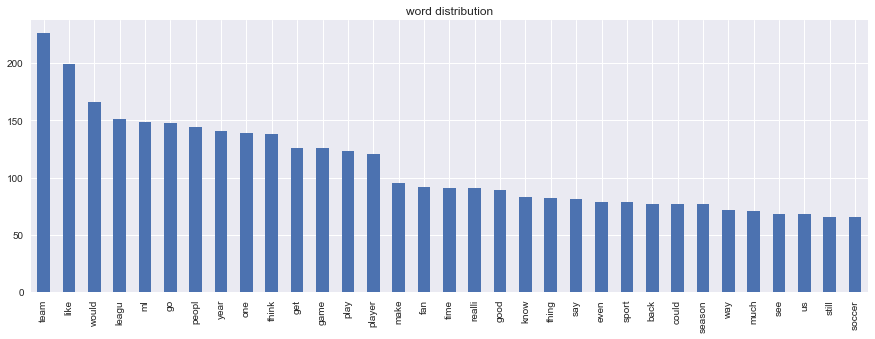

In [49]:
plt.figure(figsize=(15,5))
plt.style.use('seaborn')
model_df.sum().sort_values(ascending=False).head(33).plot(kind='bar')
plt.title('word distribution')
plt.savefig('distr')

In [50]:
cvec.transform(X_train)

<1243x3858 sparse matrix of type '<class 'numpy.int64'>'
	with 11176 stored elements in Compressed Sparse Row format>

### Modeling

In [51]:
X_trains = cvec.transform(X_train_df)
X_test = cvec.transform(X_test_df)

### Baseline accuracy 

In [52]:
y_train.value_counts(normalize=True)

1    0.564763
0    0.435237
Name: subreddit, dtype: float64

#### Plotting the baseline accuracy 

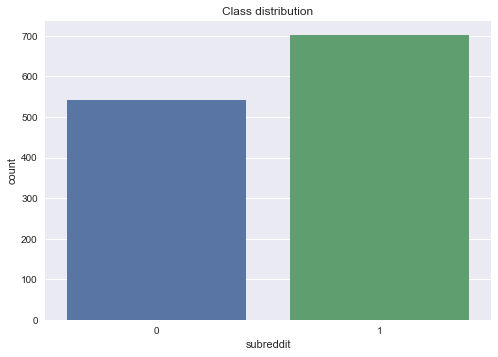

In [53]:
sns.countplot(y_train,)
plt.style.use('seaborn')
plt.title('Class distribution')
plt.savefig('ptn')

### In our dataset , 56 % of the comment are more likely to be football related commments 

In [54]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('cvec', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter= 100))
])

In [55]:
pipe.fit(X_train_df, y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                           

In [56]:
pipe.score(X_train_df, y_train)

0.9831053901850362

In [57]:
pipe.score(X_test_df, y_test) 

0.7325301204819277

In [58]:
cross_val_score(pipe, X_train_df, y_train, cv=3).mean() 

0.7208369710726966

In [59]:
 
pipe_params = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [0.9,0.95],
    'cvec__ngram_range': [(1,2)]
}

In [60]:
gs = GridSearchCV(pipe, # what object are we optimizing?
                  param_grid = pipe_params,n_jobs= 2, # what parameters values are we searching?
                  cv=10,)

In [61]:
gs.fit(X_train_df, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        pre

In [62]:
print(gs.best_score_)

0.7289225806451614


In [63]:
pred_proba = gs.predict_proba(X_test_df)


In [64]:
pred = gs.predict(X_test_df)
pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,

In [65]:
pred.shape

(415,)

In [66]:
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 2000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

In [67]:
print(gs.best_estimator_)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.9,
                                 max_features=2000, min_df=2,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                           

### classifcation metrics and evaluation 

#### confusion matrix 

In [68]:
from sklearn.metrics import plot_confusion_matrix

In [69]:
disp = confusion_matrix(y_test,
                 pred)
disp

array([[126,  56],
       [ 51, 182]], dtype=int64)

In [70]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, pred).ravel()

In [71]:
spec = tn1 / (tn1 + fp1)
sens = tp1 / (tp1 + fn1)
print(f' the true negative rate is : {spec}')
print(f' the true positive rate is : {sens}')

 the true negative rate is : 0.6923076923076923
 the true positive rate is : 0.7811158798283262


In [72]:
pred_proba = [i[1] for i in pred_proba]

pred_df1 = pd.DataFrame({'actual_values': y_test,
                        'pred_probs': pred_proba,
                        'predicted_outcomes': pred
                        })
pred_df1

,actual_values,pred_probs,predicted_outcomes
1465,0,0.738121,1
413,1,0.520153,1
838,1,0.388417,0
490,1,0.285657,0
1156,0,0.681175,1
...,...,...,...
1536,0,0.316457,0
1269,0,0.366302,0
629,1,0.986362,1
1234,0,0.448061,0


In [73]:
pred_df1['pred_probs'].mean

<bound method Series.mean of 1465    0.738121
413     0.520153
838     0.388417
490     0.285657
1156    0.681175
          ...   
1536    0.316457
1269    0.366302
629     0.986362
1234    0.448061
1108    0.437251
Name: pred_probs, Length: 415, dtype: float64>

In [74]:
#pd.DataFrame(pred_proba)

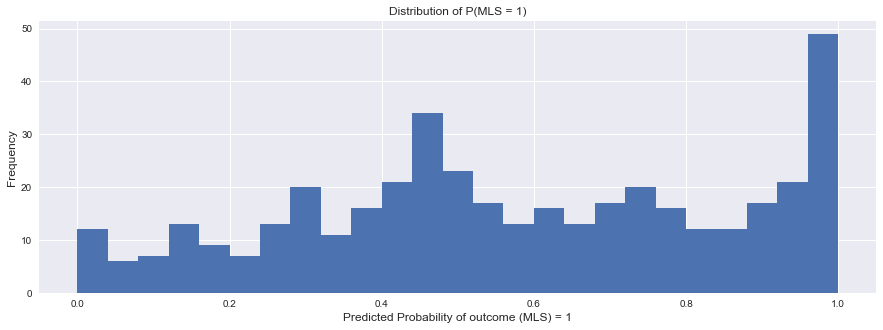

In [75]:
plt.figure(figsize = (15,5))
plt.hist(pred_df1['pred_probs'], bins = 25)
plt.title('Distribution of P(MLS = 1)', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Predicted Probability of outcome (MLS) = 1', fontsize = 12);
plt.savefig('tp')

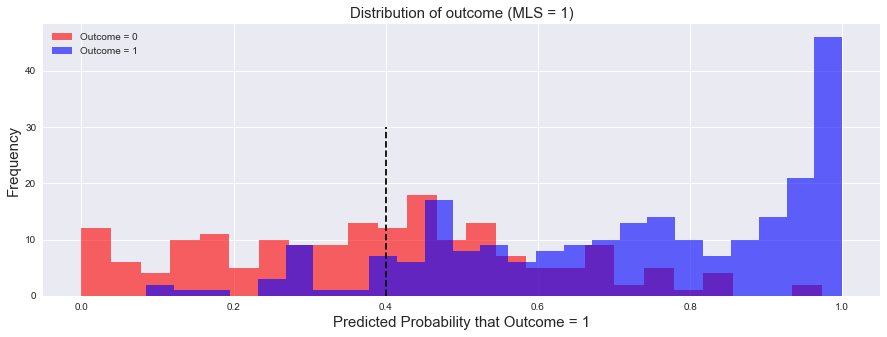

In [76]:
plt.figure(figsize = (15,5))
plt.hist(pred_df1[pred_df1['actual_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'r',
         alpha = 0.6,
         label = 'Outcome = 0')
plt.hist(pred_df1[pred_df1['actual_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Outcome = 1')
plt.vlines(x = 0.4,
           ymin = 0,
           ymax = 30,
           color = 'k',
           linestyle = '--')
plt.title('Distribution of outcome (MLS = 1)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 15)
plt.legend(fontsize=10)
plt.savefig('distribution')

### with 0.5 treshold, what does that mean to my classifier abality?

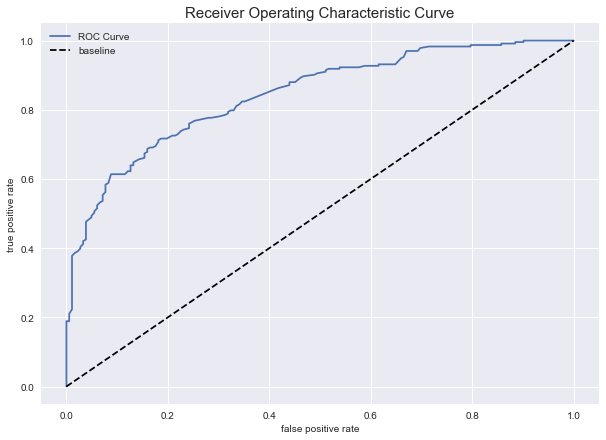

In [77]:
plt.figure(figsize = (10,7))
thresholds = np.linspace(0, 1, 200)
def roc(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
def ocu(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
tpr_values = [roc(pred_df1, 'actual_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [ocu(pred_df1, 'actual_values', 'pred_probs', prob) for prob in thresholds]
plt.plot(fpr_values,
         tpr_values, 
         label= 'ROC Curve')
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--',
         color = 'k')
plt.title('Receiver Operating Characteristic Curve', fontsize=15)
plt.ylabel('true positive rate', fontsize=10)
plt.xlabel('false positive rate', fontsize=10)
plt.savefig('roc1')
plt.legend()

#### Multinomial naive Bayes 

##### transforming our list of data into a dataframe 

In [78]:
from sklearn.naive_bayes import MultinomialNB

In [79]:
X_final = pd.DataFrame({'comment': X_train_df,
                      'Sport_type' : y_train})
X_final


,comment,Sport_type
886,think fan go allow back game leagu around worl...,1
233,remov,1
582,ml player would never abl play brazil ml team ...,1
1472,better seafood imagin,0
196,singular death time anyth peopl die unless som...,1
...,...,...
1130,nah dont realli want one rn feel weird put eff...,0
1294,make er fan look bad er fan sinc kap join team...,0
860,never heard new england flag,1
1459,guy buc,0


In [80]:
X_final_test = pd.DataFrame({'comment': X_test_df})
X_final_test 

,comment
0,son order popcorn hot dog nacho local cinema u...
1,tip want add floodlight replac grass glow ston...
2,even pogba stay still rd midfield spot right w...
3,god damnit right
4,peopl busi
...,...
410,pm wouldv nice last pick made around
411,worst thing could say cowboy
412,believ true long peopl said ml championship le...
413,enjoy think implement major player stay home s...


In [81]:
cvec2 = CountVectorizer()
X_count = cvec2.fit_transform(X_final['comment'])
X_count_test = cvec2.transform(X_final_test['comment'])
Bclass = MultinomialNB()
Bclass.fit(X_count,y_train)
#predictions =

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [82]:
Bino_score_train = Bclass.score(X_count, y_train)
Bino_score_test = Bclass.score(X_count_test,y_test) 
print(f'Binomial score on train data :{Bino_score_train}')
print(f'Binomial score on test data :{Bino_score_test}')

Binomial score on train data :0.9227674979887369
Binomial score on test data :0.7903614457831325


#### Predictive outcomes

In [83]:
predi = Bclass.predict(X_count_test)
predi

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,

In [84]:
prediction = Bclass.predict_proba(X_count_test)

In [85]:
confmatrix = confusion_matrix(y_test,
                 predi)
confmatrix

array([[123,  59],
       [ 28, 205]], dtype=int64)

In [86]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, predi).ravel()
spec = tn2 / (tn2 + fp2)
sens = tp2 / (tp2 + fn2)
print(f' the true negative rate is : {spec}')
print(f' the true positive rate is : {sens}')

 the true negative rate is : 0.6758241758241759
 the true positive rate is : 0.8798283261802575


In [87]:
predict = [i[1] for i in prediction]

pred_df = pd.DataFrame({'actual_val':y_test,
                        'pred_prob':predict,
                        'predicted_ outcome':predi
                        })
pred_df.head(5)

,actual_val,pred_prob,predicted_ outcome
1465,0,0.662633,1
413,1,0.048299,0
838,1,0.908088,1
490,1,0.196544,0
1156,0,0.961488,1


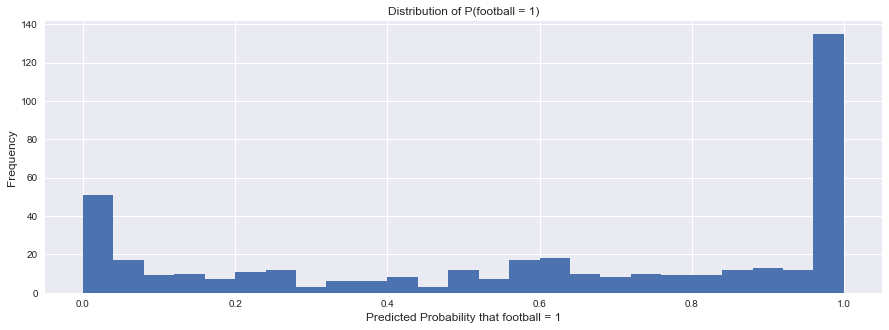

In [88]:
plt.figure(figsize = (15,5))
plt.hist(pred_df['pred_prob'], bins = 25)
# Label axes.
plt.title('Distribution of P(football = 1)', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Predicted Probability that football = 1', fontsize = 12);

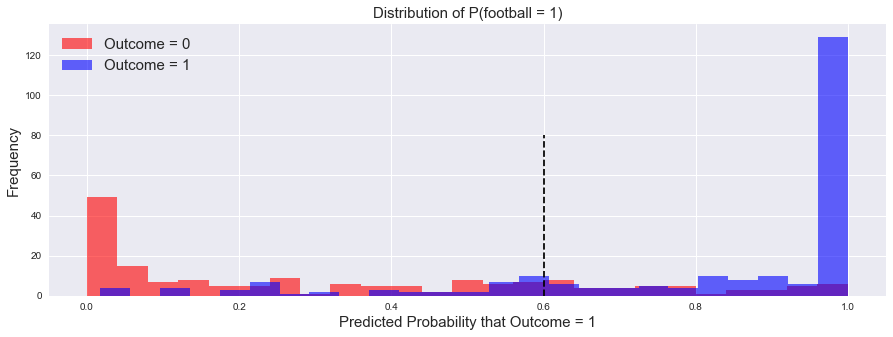

In [89]:
plt.figure(figsize = (15,5))
plt.hist(pred_df[pred_df['actual_val'] == 0]['pred_prob'],
         bins = 25,
         color = 'r',
         alpha = 0.6,
         label = 'Outcome = 0')
plt.hist(pred_df[pred_df['actual_val'] == 1]['pred_prob'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Outcome = 1')
plt.vlines(x = 0.6,
           ymin = 0,
           ymax = 80,
           color = 'k',
           linestyle = '--')
plt.title('Distribution of P(football = 1)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 15)
plt.legend(fontsize=15)
plt.savefig('tp2')

#### the quality of the classication is determined by how seprare are our prediction between the 2 outcomes(mls comment and nfl comments)

#### On the treshold of 6,the classication of nfl and mls comments  seems to be apprenrent on multinomial naive bayers 

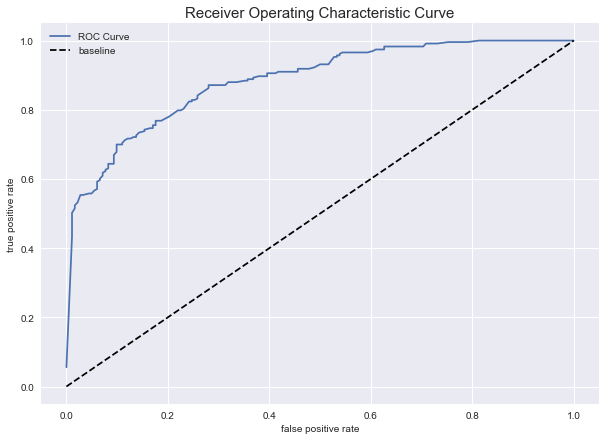

In [90]:
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))



tpr_values = [TPR(pred_df, 'actual_val', 'pred_prob', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'actual_val', 'pred_prob', prob) for prob in thresholds]
plt.plot(fpr_values,
         tpr_values, 
         label='ROC Curve')
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--',
        color='k')
plt.title('Receiver Operating Characteristic Curve', fontsize=15)
plt.ylabel('true positive rate', fontsize=10)
plt.xlabel('false positive rate', fontsize=10)
plt.legend(fontsize=10);
plt.savefig('roc2')

#### comparative analysis of classifiers

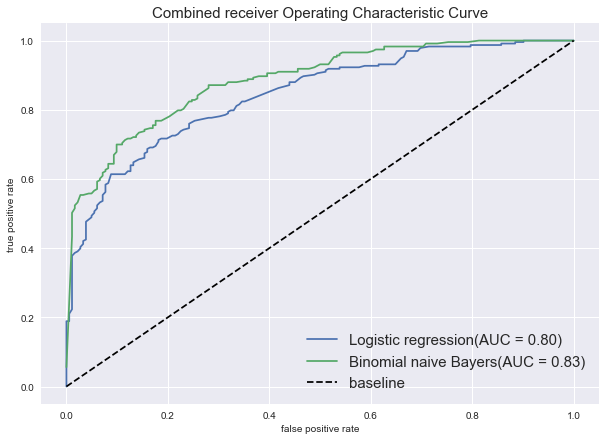

In [91]:
plt.figure(figsize = (10,7))
thresholds = np.linspace(0, 1, 200)  
def roc(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
def ocu(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
tpr_values1 = [roc(pred_df1, 'actual_values', 'pred_probs', prob) for prob in thresholds]
fpr_values1 = [ocu(pred_df1, 'actual_values', 'pred_probs', prob) for prob in thresholds]
plt.plot(fpr_values1,
         tpr_values1, 
         label='Logistic regression(AUC = 0.80)')
tpr_values = [roc(pred_df, 'actual_val', 'pred_prob', prob) for prob in thresholds]
fpr_values = [ocu(pred_df, 'actual_val', 'pred_prob', prob) for prob in thresholds]
plt.plot(fpr_values,
         tpr_values, 
         label='Binomial naive Bayers(AUC = 0.83)')
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--',
        color='k')
plt.title('Combined receiver Operating Characteristic Curve', fontsize=15)
plt.ylabel('true positive rate', fontsize=10)
plt.xlabel('false positive rate', fontsize=10)
plt.legend(fontsize=15);
plt.savefig('rocfinal')

#### the quality of our classifier is  defined by how far each curve is from the base line.
#### the further the curvefrom the baseline , the better the  classifier is to perform well on classifying comments.

#### An Optimal threshold of True positive  rate of  0.83 in Binomial naïve Bayes increases by 7%  our classifier accuracy  rate of  Predicting NFL and MLC comment on reddit 


In [92]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [101]:
fp1,tp1, treshold = roc_curve(y_test , pred)
auc1 = auc(fp1,tp1)

fp2,tp2, treshold = roc_curve(y_test , predi)
auc2 = auc(fp2,tp2)
print(f'The AUC logistic {auc1}')
print(f'The AUC logistic {auc2}')

The AUC logistic 0.7367117860680092
The AUC logistic 0.7778262510022167


#### Apply the best model on 3 new randomly chosen reddit comments 

In [103]:
Exemple = [" the Galaxy wasn't good enought today", " the team season seems to be cancelled  ", " Russel is the best player in MLS"]

exemple_count= cvec2.transform(Exemple)
Predictions = Bclass.predict(exemple_count)
Predictions

array([0, 1, 1], dtype=int64)